In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(16719, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
cat_cols = []
for col in df:
    if df[col].dtype == 'object':
        cat_cols.append(col)
cat_cols

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']

In [8]:
num_cols = []
for col in df:
    if df[col].dtype != 'object':
        num_cols.append(col)
num_cols

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Count']

In [9]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


In [10]:
df.drop_duplicates(subset=['Name', 'Platform'], inplace=True)

In [11]:
df.drop(['Critic_Count'] ,inplace =True, axis =1)
df.drop(['User_Count'] ,inplace =True, axis =1)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Critic_Score       8581
Rating             6768
User_Score         6703
Developer          6622
Year_of_Release     268
Publisher            53
Name                  1
Genre                 1
Platform              0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
dtype: int64

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df['Global_Sales'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Critic_Score,8581,0.513402
Rating,6768,0.404930
User_Score,6703,0.401041
Developer,6622,0.396195
Year_of_Release,268,0.016034
Publisher,53,0.003171
Name,1,0.000060
Genre,1,0.000060
Platform,0,0.000000
NA_Sales,0,0.000000


In [14]:
df[pd.isnull(df['Name'])]
#This selects the rows in the Name column that are null

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.0,0.08,2.39,NaN,NaN,NaN,NaN


In [15]:
df.drop(659, inplace =True)
#And then drops the columns

In [16]:
df[pd.isnull(df['Name'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating


In [17]:
df['Publisher'].fillna('Unknown', inplace=True)
#I choose to replace the empty features in the 'Publisher' column with unknown

In [18]:
df.dropna(subset=['Year_of_Release'], inplace=True)
#'I choose to drop rows with missing values here, there are only 0.01%'

In [19]:
df['Rating'].fillna('Unknown', inplace=True)
#I choose to replace the empty features in the 'Rating' column with unknown

In [20]:
df.drop(['Developer'] ,inplace =True, axis =1)
#Dropping this column altogether as there is nearly 40% missing values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16445 entries, 0 to 16718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16445 non-null  object 
 1   Platform         16445 non-null  object 
 2   Year_of_Release  16445 non-null  float64
 3   Genre            16445 non-null  object 
 4   Publisher        16445 non-null  object 
 5   NA_Sales         16445 non-null  float64
 6   EU_Sales         16445 non-null  float64
 7   JP_Sales         16445 non-null  float64
 8   Other_Sales      16445 non-null  float64
 9   Global_Sales     16445 non-null  float64
 10  Critic_Score     7980 non-null   float64
 11  User_Score       9837 non-null   object 
 12  Rating           16445 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.8+ MB


In [22]:
#Look at 'Year_of_Release' closer

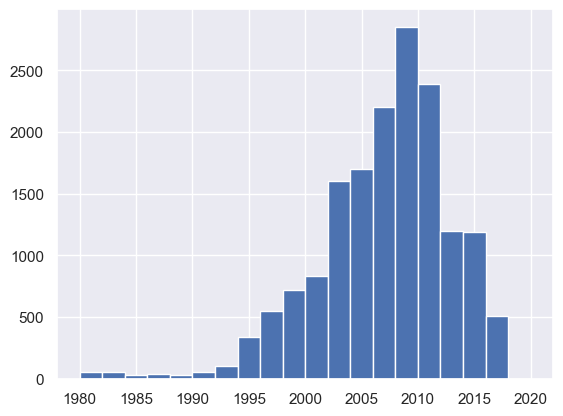

In [23]:
plt.hist(df['Year_of_Release'], bins=20)
plt.show()


In [24]:
#We can see the data is slightly skewed to the left here with a few outliers to the right. 

In [25]:
drop_year = [1980.0, 1981.0, 1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0, 1990.0, 1991.0,1992.0,1993.0, 1994.0, 1995.0 ,2017.0,2020.0]

In [26]:
df[~df.Year_of_Release.isin(drop_year)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,Unknown
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,Unknown
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,Unknown
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,Unknown
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,Unknown


In [27]:
#I create a new dataframe, removing the outliers. 

In [28]:
df[['Name', 'Platform', 'Year_of_Release','Publisher','Global_Sales']].head(5).sort_values(by = 'Global_Sales', ascending = False)

,Name,Platform,Year_of_Release,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Nintendo,82.53
1,Super Mario Bros.,NES,1985.0,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Nintendo,35.52
3,Wii Sports Resort,Wii,2009.0,Nintendo,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,31.37


# Top 5 games by global sales. 

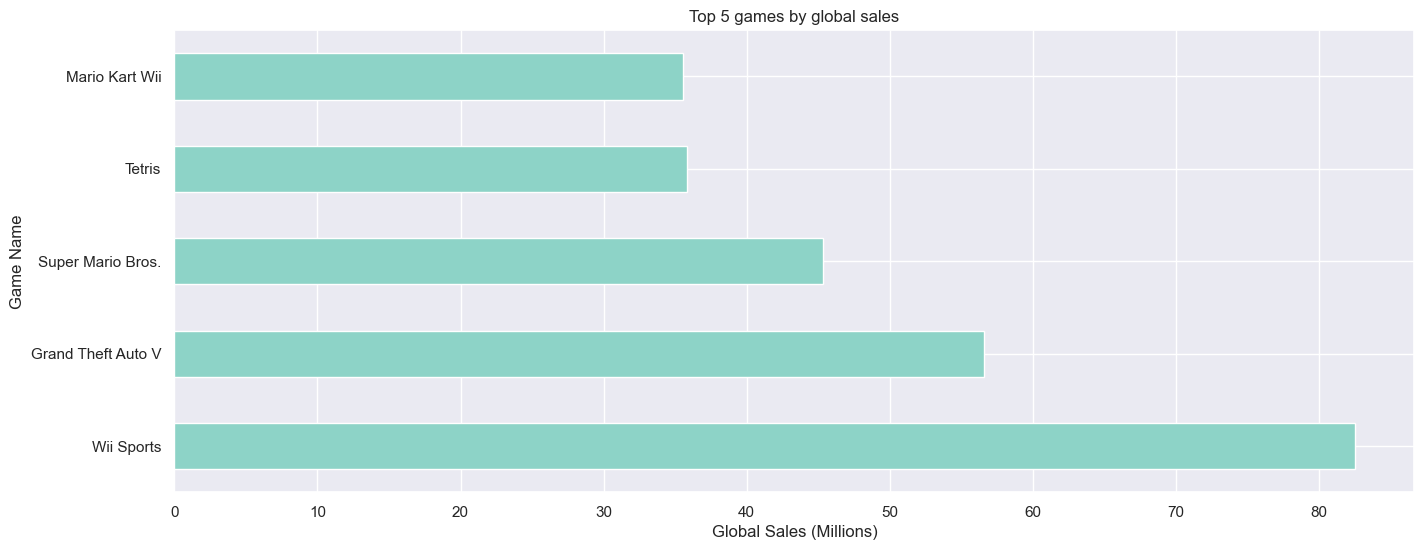

In [41]:
lmdata = df.groupby('Name')[['Name','Global_Sales']].sum().sort_values('Global_Sales', ascending = False).head(5)

lmdata['Global_Sales'].plot(kind='barh', 
                            figsize=(16, 6), 
                            colormap='Set3', 
                            xlabel='Global Sales (Millions)', 
                            title='Top 5 games by global sales')
plt.ylabel('Game Name')
plt.show()

# Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

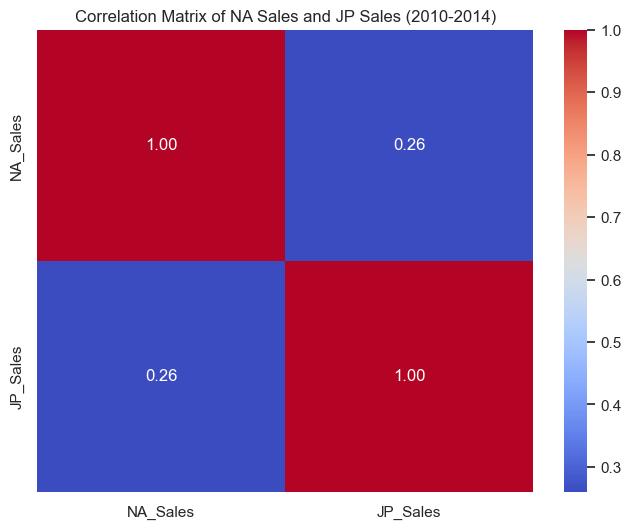

In [45]:
filtered_df = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]
sales_columns = ['NA_Sales', 'JP_Sales']

correlation_matrix = filtered_df[sales_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of NA Sales and JP Sales (2010-2014)')

plt.show()

Each cell represents the correlation coefficient between two variables. The color intensity indicates the strength and direction of the correlation: darker colors represent stronger correlations, while lighter colors represent weaker correlations. Additionally, annotations within the cells display the correlation coefficient values.

# NEED TO EDIT THIS
A correlation coefficient of 0.26 indicates a weak positive correlation between the variables "NA_Sales" and "JP_Sales". Here's how you can interpret it:

The correlation coefficient ranges from -1 to 1.
A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.
A value close to -1 indicates a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.
A value close to 0 indicates no correlation, meaning that there is no apparent relationship between the variables.
In the case of a correlation coefficient of 0.26:

It indicates a positive relationship between "NA_Sales" and "JP_Sales", meaning that as sales in North America increase, sales in Japan also tend to increase, albeit weakly.
However, the correlation is weak, suggesting that the relationship between the two variables is not very strong.

# What is the distribution of the most popular 4 game genres?  

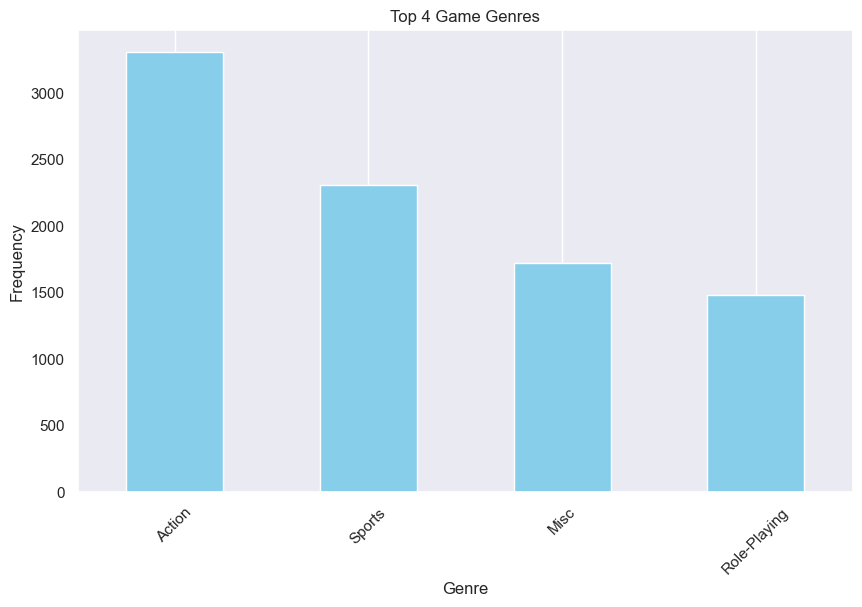

In [52]:
genre_counts = df['Genre'].value_counts().head(4)


plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 4 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.show()


# Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

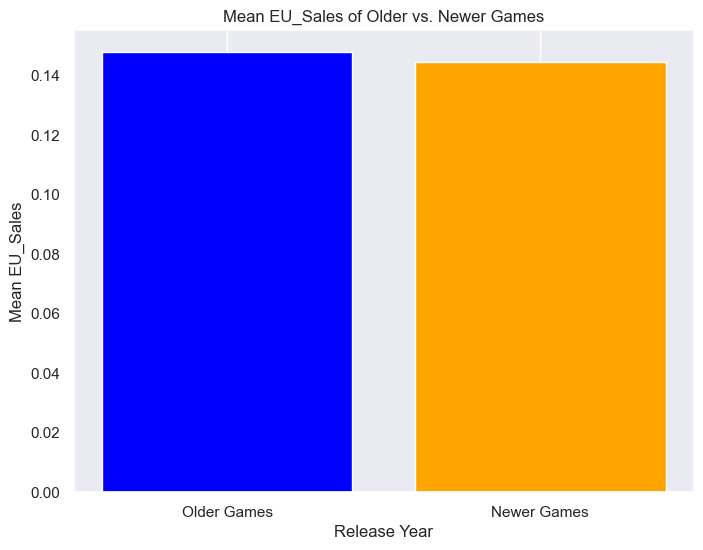

In [54]:
older_games = df[df['Year_of_Release'] <= 2005]
newer_games = df[df['Year_of_Release'] > 2005]

# Calculate the mean EU_Sales for older and newer games
mean_eu_sales_older = older_games['EU_Sales'].mean()
mean_eu_sales_newer = newer_games['EU_Sales'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Older Games', 'Newer Games'], [mean_eu_sales_older, mean_eu_sales_newer], color=['blue', 'orange'])
plt.title('Mean EU_Sales of Older vs. Newer Games')
plt.xlabel('Release Year')
plt.ylabel('Mean EU_Sales')
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()
